# Homework Set 2

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem 1:

Prove the following inequalities for the matrix norm, where $A, B$ are matrices, $\boldsymbol u$ is a vector and $b$ is a scaler.

* $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $
* $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 
* $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $
* $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$

## Problem 2

For a symmetric positive definite matrix, we can compute its inversion using either LU or Cholesky decomposition.

1. Estimate the complexity of these two different methods, verify that both of them are of $O(n^3)$ complexity. 
  * you can use external reference to answer this question, feel free to state the conclusion and give a reference. However, you are responsible for the accuracy of your conclusion, i.e., you lose points if your conclusion is incorrect.
2. Which method is relatively faster? (ie, has a smaller constant before $n^3$). 
3. Use Python's scipy/numpy LU and cholesky functions, and check if their relative speed matches your estimate.

## Problem 3

Implement the recursive cholesky decomposition algorithm discussed in the class in Python, with the following requirements:

1. use vector/matrix calculation whenever possible, but you obviously should not just call the buildin numpy/scipy functions for Cholesky decomposition 
2. detect and throw exception if the input matrix is not semi-positive definite
3. test your program against the version provided in scipy.linalg, and compare their performance

Hint: for #2, if you don't know what conditoin to catch, you can create a non-SPD matrix and observe how your program can fail. 

## Problem 4

Implement the correlated Brownian motion simulation using cholesky decomposition on the covariance matrix and correlation matrix, and show that they are indeed equivalent. You can use the covariance matrix between the three assets (SPY, OIL, GLD) given in the class.

In [84]:
import pandas as pd
import fmt

f3url = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/f3.csv"
f3 = pd.read_csv(f3url, parse_dates=[0], index_col=[0])

r = np.log(f3).diff()
cm = r.corr()
cv = r.cov()
    
fmt.displayDFs(cm, cv*1e4, headers=['Correlation', 'Covariance'])

Hint: think about how to present the equivalence. It is an important skill to present your evidence and conclusions in a clear and concise way, (think about how you can convice your future clients, coworkers and supervisors in a very limited amount of time, like in a few seconds).

## Problem 5

Take the portfolio and historical stock time series of the Dow Jones industrial average (DJIA) index:

In [85]:
djiaurl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/djia.csv"
djia = pd.read_csv(djiaurl, index_col=[0])

fmt.displayDF(djia)

,Name,Sector,Weights
Ticker,,,
MMM,3M Co.,Diversified Industrials,0.0539
AXP,American Express Co.,Consumer Finance,0.0324
T,AT&T Inc.,Fixed Line Telecommunications,0.0134
BA,Boeing Co.,Aerospace/Defense Products & Services,0.0483
CAT,Caterpillar Inc.,Commercial Vehicles & Trucks,0.0373
CVX,Chevron Corp.,Integrated Oil & Gas,0.0438
CSCO,"Cisco Systems, Inc",Networking & Communication,0.0091
KO,Coca-Cola Co.,Soft Drinks,0.0168
DD,E.I. DuPont de Nemours & Co.,Commodity Chemicals,0.0263


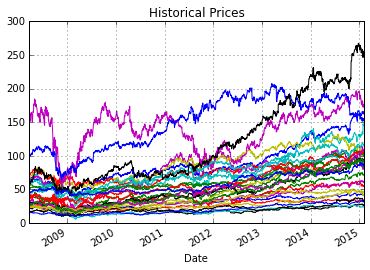

In [86]:
def download_hist_prices(tickers) : # we download the stock prices from Yahoo!Finance
    base_url = "http://ichart.finance.yahoo.com/table.csv?s="
    closeKey = 'Adj Close'
    dfs = []

    for ticker in tickers:
        try :
            url = base_url + ticker
            dfs.append(pd.read_csv(url, parse_dates=[0], index_col=[0]).rename(columns={closeKey:ticker})[ticker])
        except Error:
            print "error in " + ticker
            continue

    return pd.concat(dfs, axis=1, join='inner')

histprice = download_hist_prices(djia.index).sort()
histprice.plot(legend=False, title='Historical Prices');

This problem explores the practical problems in estimating the mean and volatility from the stock price time series. We assume that stock prices follow Geometric Brownian motion, thus their log returns are normally distributed. It is common practice to estimate the mean and variance of the log returns $r(t; \Delta) = \log\left(\frac{s(t+\Delta)}{s(t)}\right)$ from historical data, where $\Delta$ is the period of returns. Suppose we are interested in estimating the annualized returns with $\Delta = 1$, and we have more frequent data samples of $\delta < \Delta$ (such as daily data, $\delta = 1/250$), then we could estimate annualized return mean and variance using the more frequent observations as:

$$ \mathbb{E}[r(t; \Delta)] = \frac{\Delta}{\delta} \mathbb{E}[r(t; \delta)] \approx \frac{\Delta}{\delta} \frac{1}{n}\sum_{k=0}^{n-1} r(t + k\delta; \delta) := \frac{\Delta}{\delta} \mu $$
$$ \sigma^2\left(r(t; \Delta)\right) = \frac{\Delta}{\delta} \sigma^2\left(r(t; \delta)\right) \approx \frac{\Delta}{\delta} \frac{1}{n-1} \sum_{k=0}^{n-1}  \left(r(t + k\delta; \delta) - \mu\right)^2$$

where $\mu$ is the average daily historical log returns. These expressions directly follow the Geometric Brownian motions. For the following questions, assume that we estimate expected returns by averaging the log returns over consecutive, non-overlapping windows. 

1. are they the same if we estimate the annualized returns using daily or yearly windows? explain your conclusion.
2. are they the same if we estimate the annualized vol using daily or yearly windows? explain your conclusion.
3. for the 30 DJIA sstocks, how many years of data we'd need so that the annualized return estimate is accurate within 1%?
4. take the daily return time series from the 30 DJIA stocks, divide them to consecutive monthly intervals (you can assume each month has 20 business days), estimate the volatility for each monthly interval, and take their averages as an estimator of the annualized vol. Estimate the error of the volatility estimate for the 30 stocks from this procedure. 
5. comments on the implication of your results

Hint: 
* It is well known that if we average $n$ independent samples, the error of of the average estimator is about $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the std dev of the population we are sampling (i.e, the underlying random variable). You can use this fact to answer the last 3 questions.
* numpy's std and mean functions are useful, they can take an axis as parameter to compute statistic along a given axis.

## Problem 6

This problem uses the same data set as in the previous problem.

1. estimate the historical correlation and covariance matrix of the DJIA constiuents' daily returns, 
2. estimate historical excess return of individual stocks (assume the historical risk free rate is 0%)
3. compute the optimal portfolio using the estimated historical excess return and covariance matrix, comment on whether the portfolio looks reasonable.
4. compute the implied return forecast from the actual DJIA portfolio, compare this to the historical estimate, comment on which may be a better forecast for the future returns
5. compute the condition number of the covariance matrix, and comments the numerical stability of the optimal portfolio
6. does the result change if you use daily returns or weekly returns for the historical estimate? 
7. use numerical simulation to show that the optimal portfolio from #3 indeed has the largest Sharp ratio for the historical excess return and covariance; the best way to illustrate this is to introduce many random perturbations around the optimal portfolio, 
8. [open question] comment on what practical implication you might infer from your results in 7

Hints: 
* you may run into singular matrix when reverting the covariance matrix, try to find a work around if you do, (imagine what you would do if your future boss needs some results fast, and he doesn't understand what is a singular matrix that can't be inverted).